<a href="https://colab.research.google.com/github/danishmahmoodali/Deep-Learning-Projects/blob/main/Neural%20Networks/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Danish Mahmood Ali

B18101028

In [ ]:
!gdown --id 1ozsMOu3NmzE1Ad7iFwkN_fs9443dDFpR

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
from random import seed
from random import random
import math
from sklearn import preprocessing

#uploaded = files.upload()
#dataset = list(uploaded.keys())[0]
ds = pd.read_excel(open('/content/ann dataset.xlsx','rb'))  #importing excel file
ds = pd.DataFrame(preprocessing.normalize(ds))
ds.rename(columns={0: 'X1', 1: 'X2',2: 'X3', 3: 'Y'}, inplace=True)
opt = []
learning_rate = 1
threshold_value = 0.0005  #threshold value
y= 0;
seed(1)
weights = {'w14': random(),'w15': random(),'w24': random(),'w25': random(),
           'w34': random(),'w35': random(),'w46': random(),'w56': random() }
bias = {'bias 4': random(),'bias 5':random(),'bias 6':random()}
outputs = {'4': 0, '5': 0, '6': 0}
for i in range(704):
    errorvalue = 1
    inputs = {'X1':ds['X1'][i],'X2':ds['X2'][i],'X3':ds['X3'][i], 'Y':ds['Y'][i]}
    print(inputs);print('\n')
    while errorvalue>0.00005:
      #print(weights);print('\n')
      #print(bias);print('\n')
      outputs['4'] = (ds['X1'][i]*weights['w14'])+(ds['X2'][i]*weights['w24'])+(ds['X3'][i]*weights['w34'])+bias['bias 4']
      outputs['4'] = 1.0 / (1.0 + math.exp(-outputs['4']))

      outputs['5'] = (ds['X1'][i]*weights['w15'])+(ds['X2'][i]*weights['w25'])+(ds['X3'][i]*weights['w35'])+bias['bias 5']
      outputs['5'] = 1.0 / (1.0 + math.exp(-outputs['5']))

      outputs['6'] = (outputs['4']*weights['w46'])+(outputs['5']*weights['w56'])+bias['bias 6']
      outputs['6'] = 1.0 / (1.0 + math.exp(-outputs['6']))
      #print(outputs)
      errorvalue =np.absolute( outputs['6']*(1-outputs['6'])*(ds['Y'][i]-outputs['6']))
      #print(errorvalue)
      error = {'Error 4': np.absolute(outputs['4']*(1-outputs['4'])*(errorvalue*weights['w46'])), 'Error 5':np.absolute( outputs['5']*(1-outputs['5'])*(errorvalue*weights['w56'])),'Error 6':outputs['6']*(1-outputs['6'])*(ds['Y'][i]-outputs['6'])}
      if errorvalue > 0.00005:
        bias['bias 4'] += learning_rate * error['Error 4']
        bias['bias 5'] += learning_rate * error['Error 5']
        bias['bias 6'] += learning_rate * error['Error 6']
        weights['w14'] += learning_rate * error['Error 4'] * ds['X1'][i]
        weights['w15'] += learning_rate * error['Error 5'] * ds['X1'][i]
        weights['w24'] += learning_rate * error['Error 4'] * ds['X2'][i]
        weights['w25'] += learning_rate * error['Error 5'] * ds['X2'][i]
        weights['w34'] += learning_rate * error['Error 4'] * ds['X3'][i]
        weights['w35'] += learning_rate * error['Error 5'] * ds['X3'][i]
        weights['w46'] += learning_rate * error['Error 6'] * outputs['4']
        weights['w56'] += learning_rate * error['Error 6'] * outputs['5']

    opt.append(outputs['6'])
    print(ds['Y'][i] , outputs['6'], sep = ": ")

{'X1': 0.4983545612992956, 'X2': 0.4905542678224078, 'X3': 0.5075664161046791, 'Y': 0.5033642565737658}


0.5033642565737658: 0.5035546162935899
{'X1': 0.5036422073768426, 'X2': 0.49862974581770575, 'X3': 0.49082514512629516, 'Y': 0.5067579110838853}


0.5067579110838853: 0.5065720310925357
{'X1': 0.5024276539411944, 'X2': 0.4993385739886839, 'X3': 0.4943689440203208, 'Y': 0.503812254982278}


0.503812254982278: 0.5039960628283442
{'X1': 0.5036202683544656, 'X2': 0.5022361949402552, 'X3': 0.49914829213664735, 'Y': 0.4949509190329667}


0.4949509190329667: 0.49512766440828065
{'X1': 0.49568159999778166, 'X2': 0.5043637476156024, 'X3': 0.5029776309359716, 'Y': 0.4969209839530041}


0.4969209839530041: 0.4967402713161119
{'X1': 0.5026072585207496, 'X2': 0.5013536922756021, 'X3': 0.5101351898439923, 'Y': 0.485584706314677}


0.485584706314677: 0.48577484341921856
{'X1': 0.4889686728040056, 'X2': 0.5061098526057975, 'X3': 0.5048475504467909, 'Y': 0.4998913931240486}


0.4998913931240486: 0.

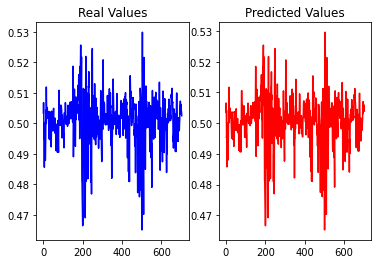

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(ds['Y'],color = 'b')
ax2.plot(opt, color = 'r')

ax1.set_title('Real Values')
ax2.set_title('Predicted Values')

plt.show()